In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# import csv
cali_housing_df = pd.read_csv("Resources/complete_housing_data.csv")
cali_housing_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,county_name,total_crime_rate
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Contra Costa,4.776461
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Contra Costa,4.776461
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda,6.625693
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda,6.625693
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda,6.625693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,Yuba,5.778337
20606,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,Yuba,5.778337
20607,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,Yuba,5.778337
20608,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,Yuba,5.778337


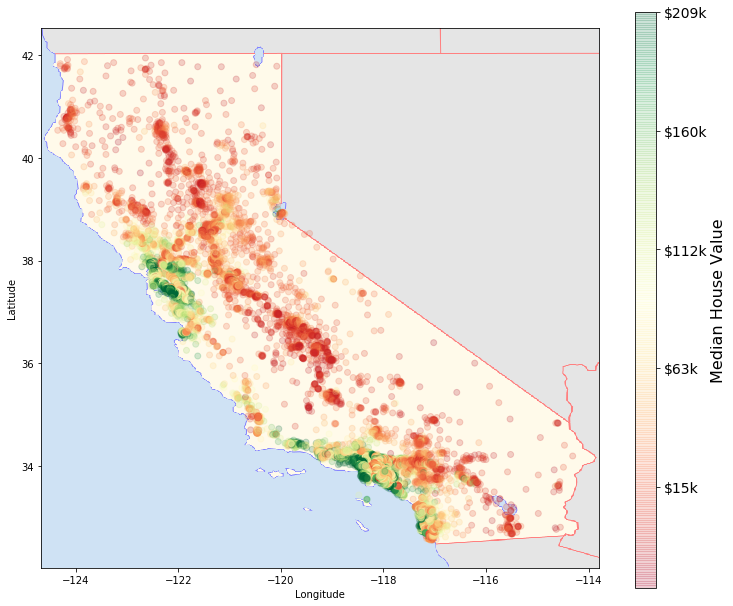

In [10]:
# create fig, axes
fig, ax = plt.subplots(figsize=(10,10))

# force equal aspect ratio
ax.set_aspect('equal')

# get coordinate
lat = cali_housing_df["latitude"]
long = cali_housing_df["longitude"]

# set axes limits
# ax.set_xlim([min(long), max(long)])
# ax.set_ylim([min(lat), max(lat)])

# get coloration for house value
coloring = cali_housing_df.median_house_value

# create scatterplot
house_val = ax.scatter(long, lat, c=coloring, cmap='RdYlGn', alpha=0.2)

# create x,y labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# set axes for colorbar
caxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
cbar = fig.colorbar(house_val, cax=caxes, orientation='vertical')
cbar.set_label("Median House Value", fontsize=16)

# set colorbar ticks
prices = cali_housing_df.median_house_value
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)

# overlay outline of California
xlim = ax.get_xlim()
ylim = ax.get_ylim()
im = plt.imread("Images/cali_outline.png")
implot = ax.imshow(im, extent=[-124.68, -113.80, 32.01, 42.53], alpha=0.5)

# save image
# plt.savefig("Images/cali_housing.png")

# show plot
plt.show()
